In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install --force-reinstall -v openpyxl

Using pip 22.1.2 from /Users/sunilthapa/opt/miniconda3/envs/AML1214/lib/python3.8/site-packages/pip (python 3.8)
  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [3]:
df = pd.read_excel('Sample_Time_series_Air_Quality.xlsx')

In [4]:
df.head()

,Date,Time,Hourly CO Concentration,Hourly NO2 Concentration,Temperature,Absolute Humidity(AH)
0,11/03/2004,00.00.00,12,77,113,7603
1,11/03/2004,01.00.00,1,76,107,7702
2,11/03/2004,02.00.00,9,60,107,7648
3,11/03/2004,03.00.00,6,-200,103,7517
4,11/03/2004,04.00.00,-200,34,101,7465


In [27]:
df.dtypes

Date                        object
Time                        object
Hourly CO Concentration      int64
Hourly NO2 Concentration     int64
Temperature                  int64
Absolute Humidity(AH)        int64
dtype: object

In [5]:
df.columns

Index(['Date', 'Time', 'Hourly CO Concentration', 'Hourly NO2 Concentration',
       'Temperature', 'Absolute Humidity(AH)'],
      dtype='object')

In [6]:
df.isnull().sum()

Date                        0
Time                        0
Hourly CO Concentration     0
Hourly NO2 Concentration    0
Temperature                 0
Absolute Humidity(AH)       0
dtype: int64

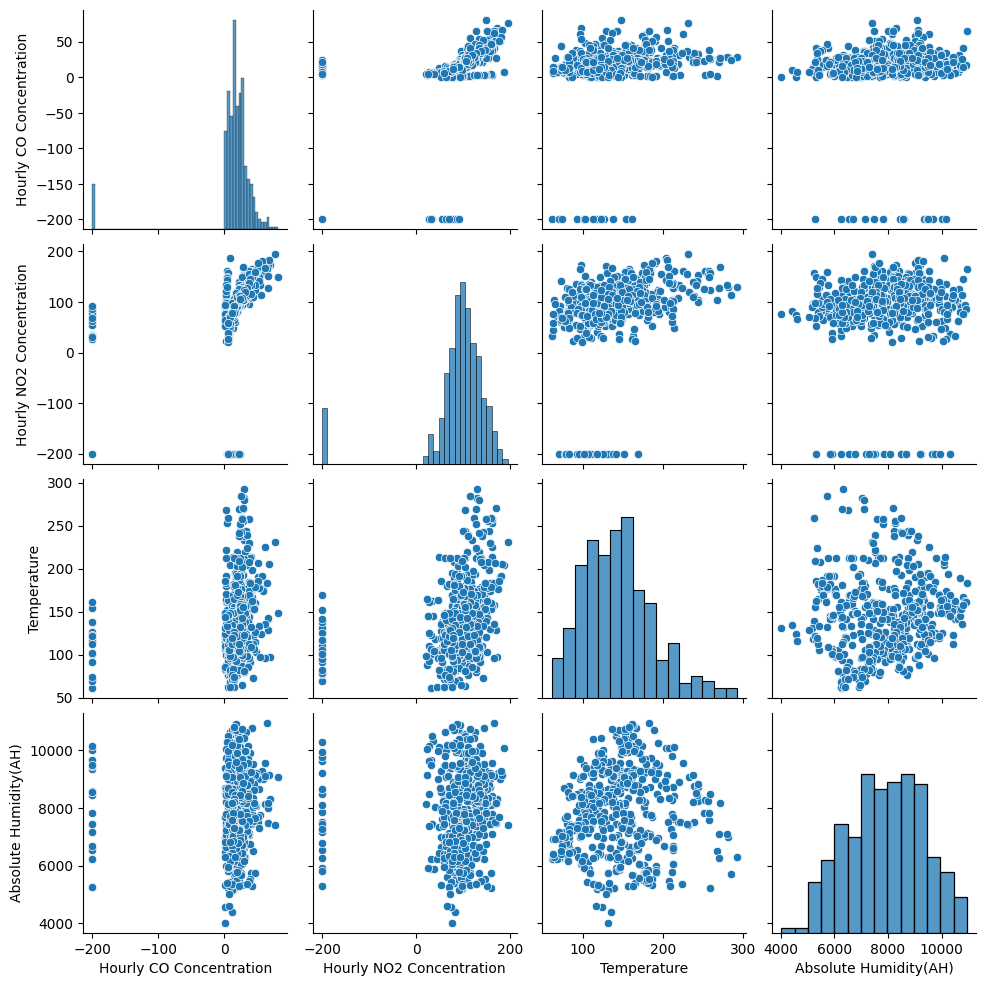

In [14]:
correlogram_plot = sns.pairplot(df, )
correlogram_plot.fig.set_size_inches(10,10)

In [15]:
df.describe()

,Hourly CO Concentration,Hourly NO2 Concentration,Temperature,Absolute Humidity(AH)
count,504.000000,504.000000,504.000000,504.000000
mean,13.426587,89.299603,144.188492,7896.958333
std,43.383886,69.495995,44.650289,1407.170226
min,-200.000000,-200.000000,61.000000,4023.000000
25%,11.000000,79.000000,110.000000,6887.000000
50%,19.000000,99.000000,141.000000,7964.500000
75%,28.000000,124.000000,169.000000,8978.500000
max,81.000000,194.000000,293.000000,10945.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x28b828940>,
 'caps': [<matplotlib.lines.Line2D at 0x28b8286a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28b8289d0>],
 'medians': [<matplotlib.lines.Line2D at 0x28b8920a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28b892190>],
 'means': []}

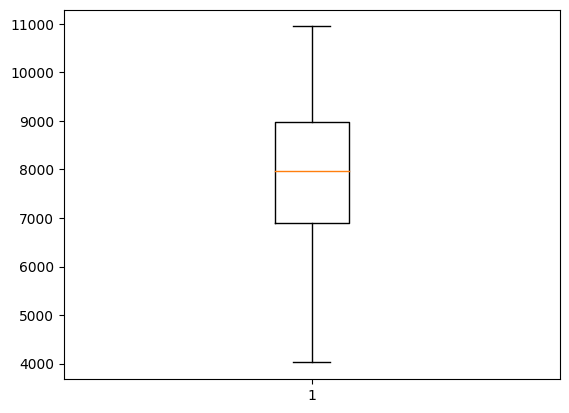

In [35]:
plt.boxplot(df['Absolute Humidity(AH)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x292f6dbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x2933a2040>,
 'boxes': [<matplotlib.lines.Line2D at 0x292f6d940>],
 'medians': [<matplotlib.lines.Line2D at 0x2933a2580>],
 'fliers': [<matplotlib.lines.Line2D at 0x2933a2820>],
 'means': []}

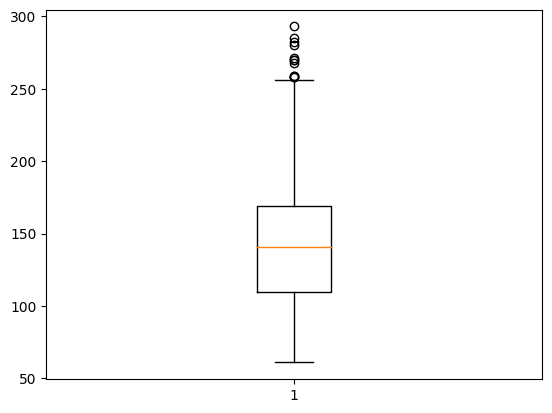

In [38]:
plt.boxplot(df['Temperature'])

{'whiskers': [<matplotlib.lines.Line2D at 0x293565b50>,
 'caps': [<matplotlib.lines.Line2D at 0x2935770d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2935658b0>],
 'medians': [<matplotlib.lines.Line2D at 0x293577610>],
 'fliers': [<matplotlib.lines.Line2D at 0x2935778b0>],
 'means': []}

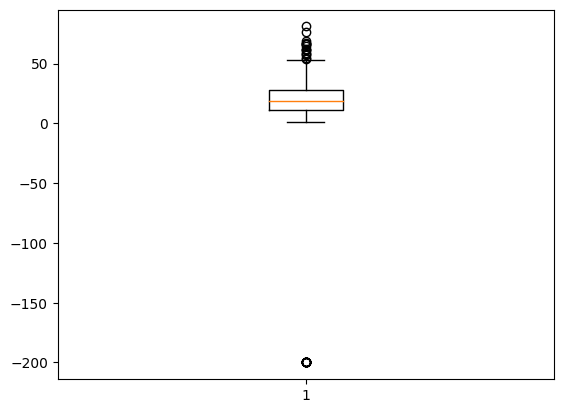

In [39]:
plt.boxplot(df['Hourly CO Concentration'])

{'whiskers': [<matplotlib.lines.Line2D at 0x292fe65e0>,
 'caps': [<matplotlib.lines.Line2D at 0x292fe6b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x292fe6370>],
 'medians': [<matplotlib.lines.Line2D at 0x292fe20a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x292fe2340>],
 'means': []}

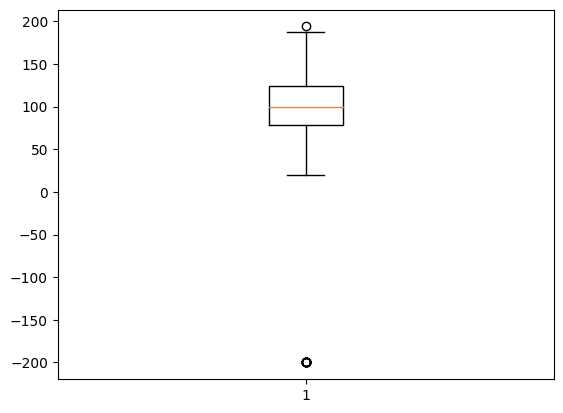

In [40]:
plt.boxplot(df['Hourly NO2 Concentration'])

In [47]:
def remove_outliers(dataset):
    temp_dataset = dataset.copy()
    all_columns = temp_dataset.columns[2:]
    for ea_columns in all_columns:
        Q1 = temp_dataset[ea_columns].quantile(0.25)
        Q3 = temp_dataset[ea_columns].quantile(0.75)
        IQR = Q3 - Q1
        print("IQR:", IQR)
        boundary = [Q1 - (1.5 * IQR), Q3 + (1.5 * IQR)]
        temp_dataset = temp_dataset[(temp_dataset[ea_columns] > boundary[0]) & (temp_dataset[ea_columns] < boundary[1])]
    return temp_dataset

In [48]:
df_outlier = remove_outliers(df)

IQR: 17.0
IQR: 42.0
IQR: 58.0
IQR: 2077.0


In [50]:
df_outlier.head()

,Date,Time,Hourly CO Concentration,Hourly NO2 Concentration,Temperature,Absolute Humidity(AH)
0,11/03/2004,00.00.00,12,77,113,7603
1,11/03/2004,01.00.00,1,76,107,7702
2,11/03/2004,02.00.00,9,60,107,7648
5,11/03/2004,05.00.00,7,28,110,7366
6,11/03/2004,06.00.00,7,48,105,7353


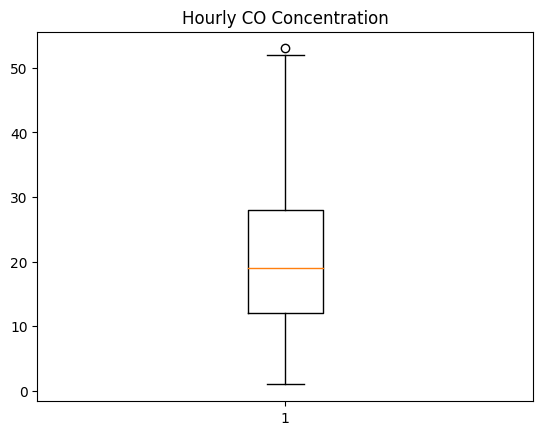

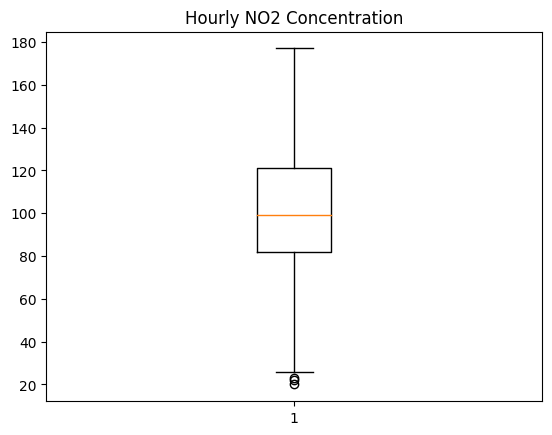

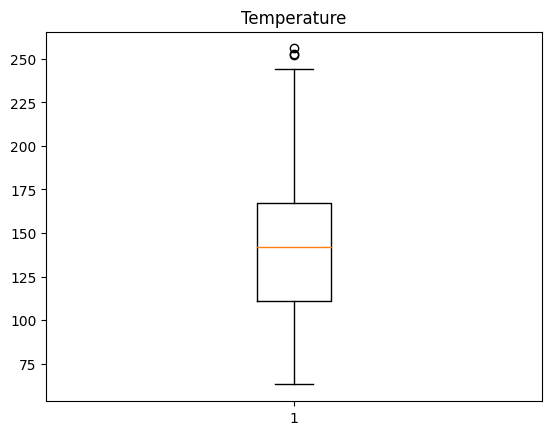

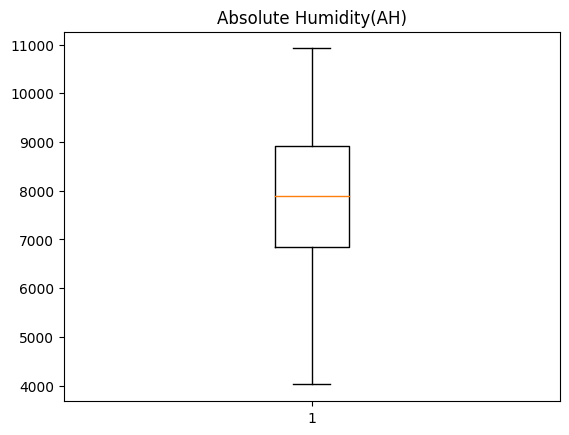

In [60]:
for c in df.columns[2:]:
    plt.boxplot(df_outlier[c])
    plt.title(c)
    plt.show()

/var/folders/4z/9ddz1dxn051gf97hvy69q3f80000gn/T/ipykernel_72401/205535300.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df_outlier.corr()


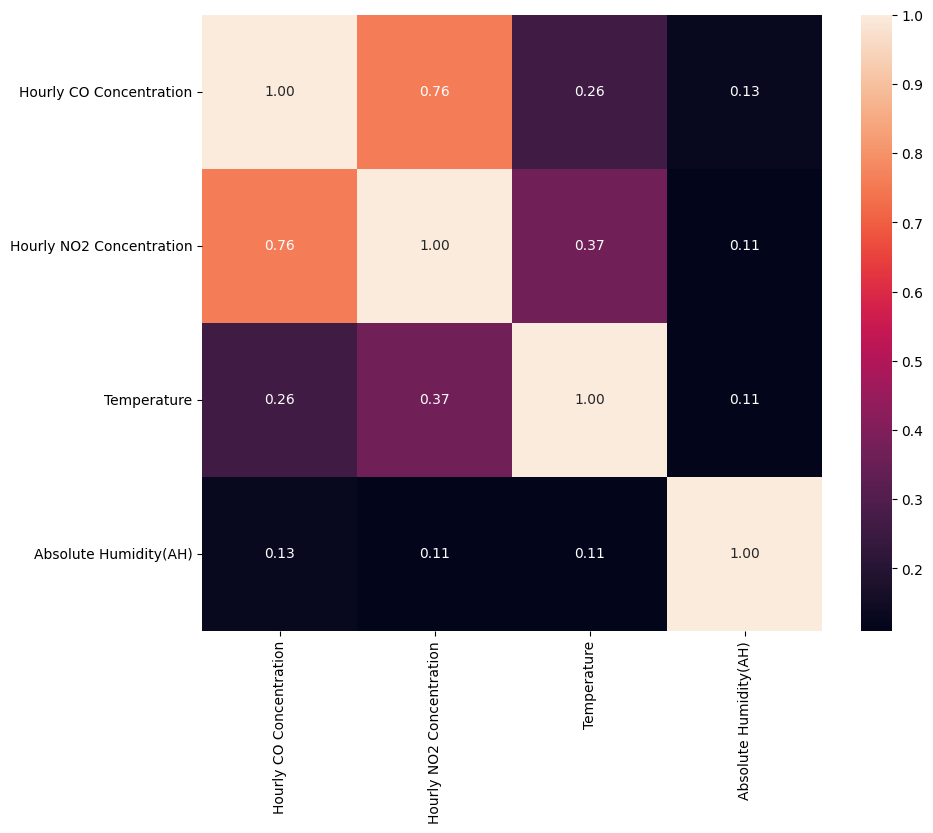

In [59]:
cormat = df_outlier.corr()
cormat = round(cormat, 2)

fig, ax = plt.subplots(figsize = (10,8))

ax = sns.heatmap(cormat, annot = True, fmt='.2f')

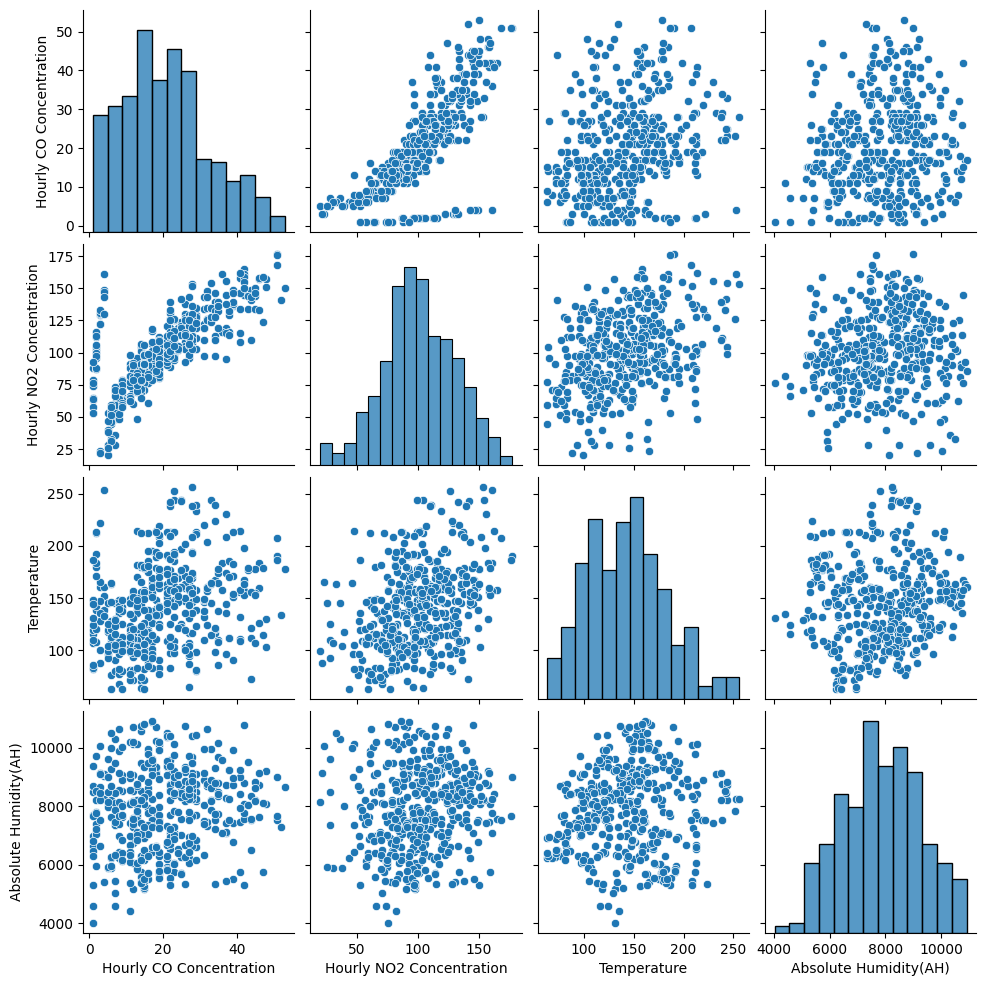

In [61]:
correlogram_plot = sns.pairplot(df_outlier, )
correlogram_plot.fig.set_size_inches(10,10)

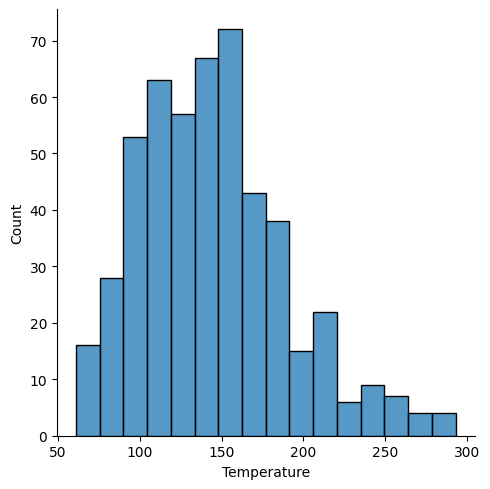

In [67]:
sns.displot(df['Temperature'])

Text(0.5, 1.0, 'Temperature vs Time')

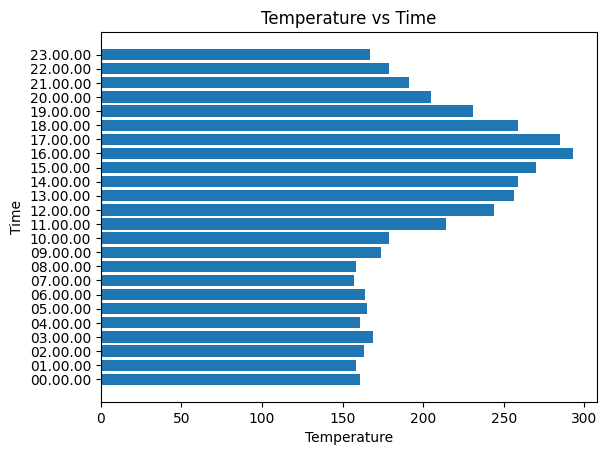

In [71]:
plt.barh(df['Time'], df['Temperature'])
plt.ylabel('Time')
plt.xlabel('Temperature')
plt.title('Temperature vs Time')


/var/folders/4z/9ddz1dxn051gf97hvy69q3f80000gn/T/ipykernel_72401/1864910268.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature'])


<AxesSubplot: xlabel='Temperature', ylabel='Density'>

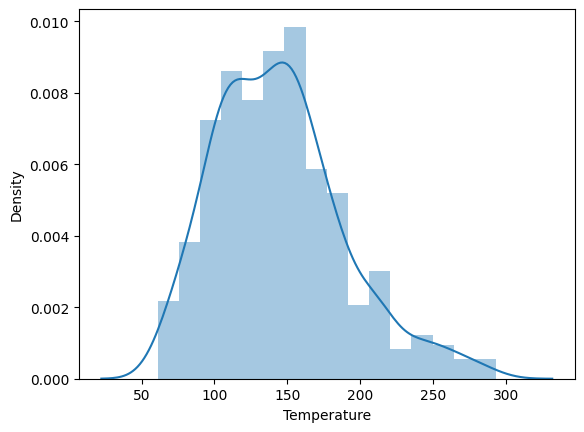

In [77]:
sns.distplot(df['Temperature'])

Text(0, 0.5, 'Date')

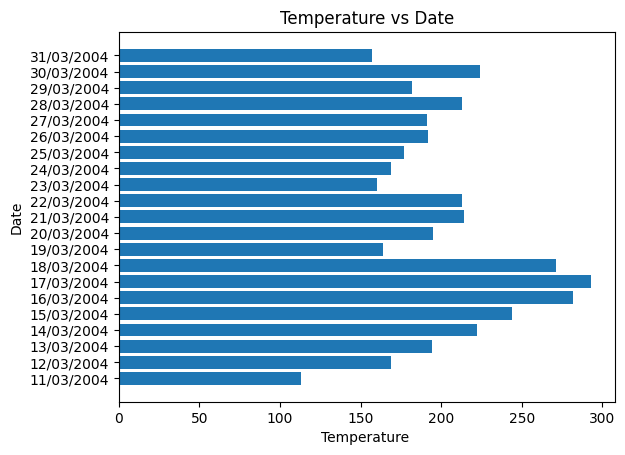

In [86]:
plt.barh(df['Date'], df['Temperature'])
plt.title('Temperature vs Date')
plt.xlabel('Temperature ')
plt.ylabel('Date')

Text(0, 0.5, 'Date')

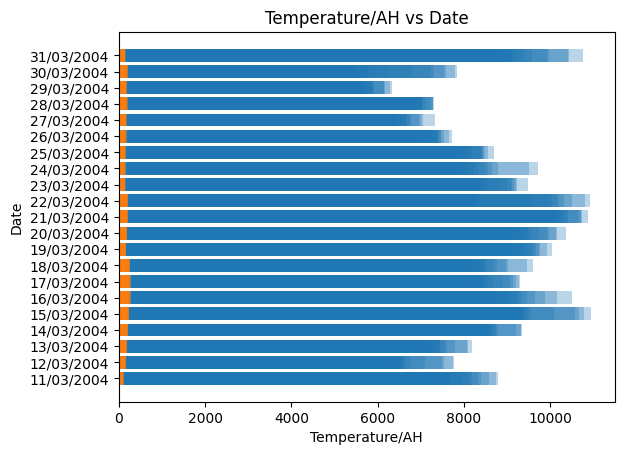

In [88]:
plt.barh(df['Date'], df['Absolute Humidity(AH)'], alpha=0.3)
plt.barh(df['Date'], df['Temperature'], alpha=0.3)
plt.title('Temperature/AH vs Date')
plt.xlabel('Temperature/AH')
plt.ylabel('Date')